<a href="https://colab.research.google.com/github/rizkyarif12/PCVK_Ganjil_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Praktikum

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

 Mengubah tingkat kecerahan citra
---------------------------------
Masukan nilai kecerahan: 50


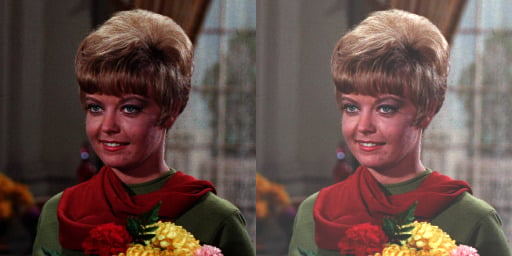

In [ ]:

print(' Mengubah tingkat kecerahan citra')
print("---------------------------------")
try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat([original, brightness_image])
cv2_imshow(final_frame)

# Tugas Praktikum

 ## 1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
#
 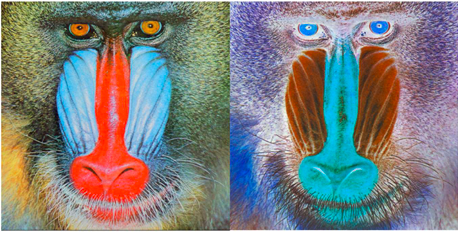

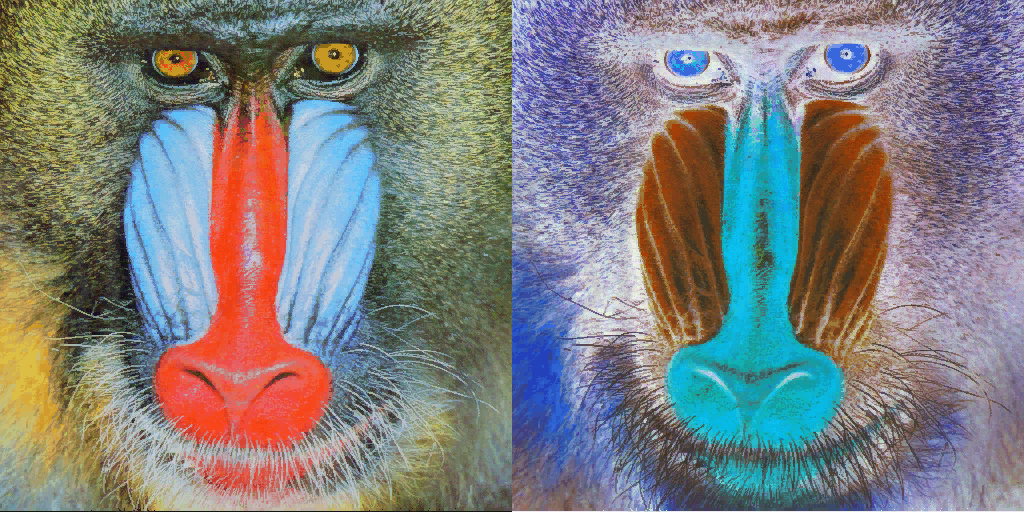

In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK/monkey.png')
# Inverse image
inverse_image = 255 - original
compare_img = cv.hconcat([original, inverse_image])
cv2_imshow(compare_img)

## 2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:

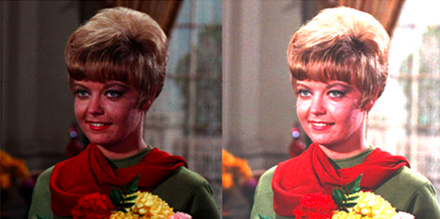

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan nilai kecerahan: 50
Masukkan nilai kontras: 2


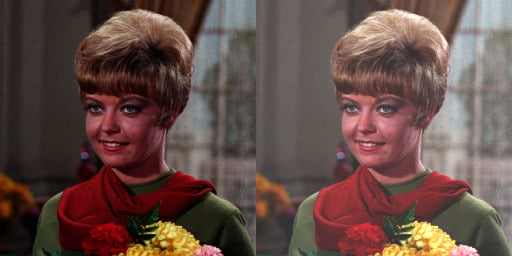

In [ ]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')

# Input nilai kecerahan dan kontras
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
    contrast = int(input('Masukkan nilai kontras: '))
except ValueError:
    print('Error, not a number')
    brightness = 0
    contrast = 0

# Fungsi untuk menerapkan kecerahan linier
def apply_brightness(image, brightness):
    brightness_image = np.zeros(image.shape, image.dtype)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                brightness_image[y, x, c] = np.clip(image[y, x, c] + brightness, 0, 255)
    return brightness_image

# Fungsi untuk menerapkan transformasi kontras
def apply_contrast(image, contrast):
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
    def truncate(value):
        return max(0, min(255, value))

    contrast_image = np.zeros_like(image)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                contrast_image[y, x, c] = truncate(factor * (image[y, x, c] - 128) + 128)
    return contrast_image

# Load gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/female.jpg')

# Terapkan transformasi kecerahan
brightness_image = apply_brightness(original, brightness)

# Terapkan transformasi kontras pada hasil transformasi kecerahan
brightness_contrast_image = apply_contrast(brightness_image, contrast)

# Gabungkan gambar asli dan hasil
final_frame = cv.hconcat([original, brightness_contrast_image])
cv2_imshow(final_frame)

## 3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:

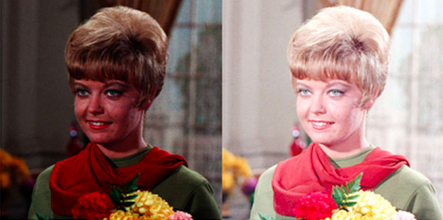

Mengubah tingkat kecerahan citra dengan transformasi log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


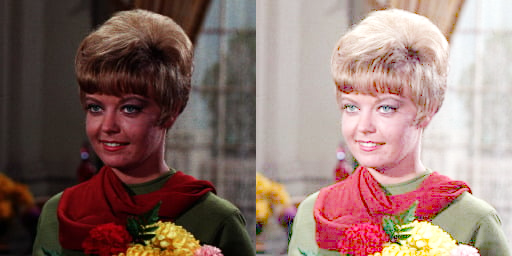

In [ ]:
print('Mengubah tingkat kecerahan citra dengan transformasi log')
print('--------------------------------------------------------')

# Input nilai konstanta brightness
try:
    c = float(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')
    c = 1.0

# Fungsi untuk menerapkan transformasi logarithmic brightness
def apply_log_brightness(image, c):
    # Konversi gambar ke skala float64 untuk perhitungan log
    log_image = c * np.log1p(image.astype(np.float64))  # np.log1p(x) sama dengan np.log(1 + x)
    # Potong nilai agar berada dalam rentang 0-255
    log_image = np.clip(log_image, 0, 255).astype(np.uint8)
    return log_image

# Load gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/female.jpg')

# Terapkan transformasi logarithmic brightness
log_brightness_image = apply_log_brightness(original, c)

# Gabungkan gambar asli dan hasil
final_frame = cv.hconcat([original, log_brightness_image])
cv2_imshow(final_frame)

## 4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

### a. Averaging
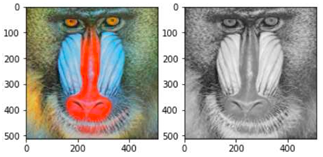

### b. Lightness
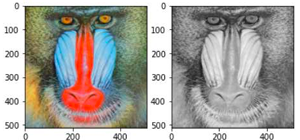

### c. Luminance
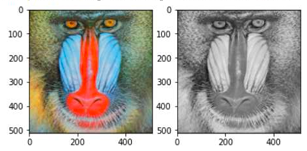

### a. Averaging


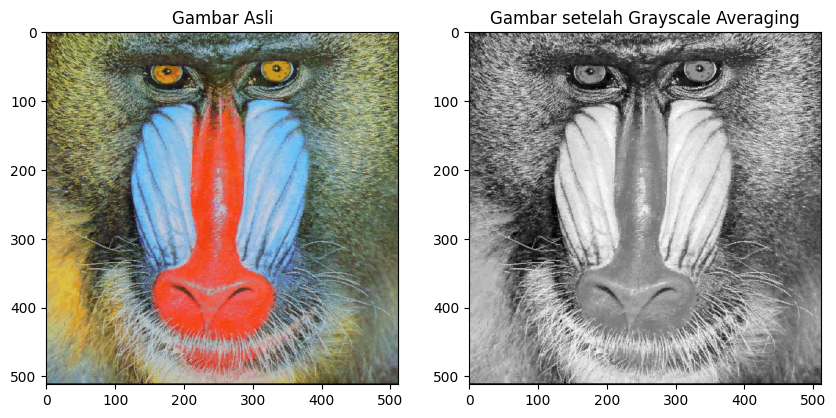

In [3]:
import matplotlib.pyplot as plt

# Load gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/monkey.png')

# Fungsi untuk menerapkan transformasi grayscale dengan metode averaging
def grayscale_averaging(image):
    return np.mean(image, axis=2).astype(np.uint8)

# Terapkan transformasi grayscale averaging
averaging_image = grayscale_averaging(original)

# Plot gambar original dan grayscale
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title("Gambar setelah Grayscale Averaging")
plt.imshow(averaging_image, cmap='gray')
plt.axis('on')

plt.show()

### b. Lightness

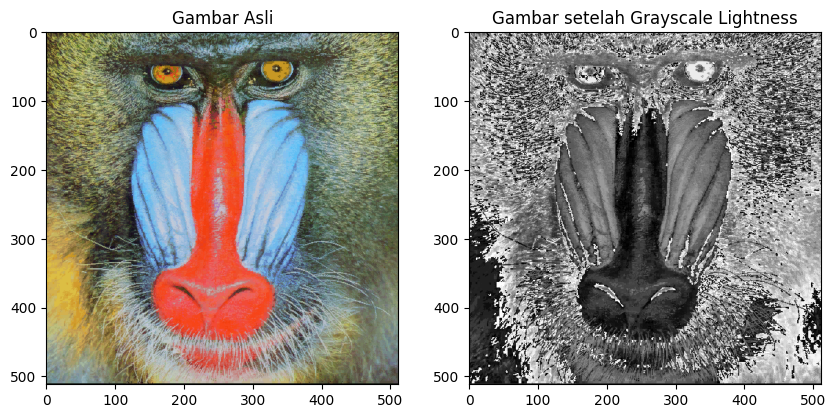

In [ ]:
# Fungsi untuk menerapkan transformasi grayscale dengan metode lightness
lightness_image2 = (np.max(original, axis=2) + np.min(original, axis=2)) / 2

# Plot gambar original dan grayscale
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title("Gambar setelah Grayscale Lightness")
plt.imshow(lightness_image2, cmap='gray')
plt.axis('on')

plt.show()

### c. Luminance

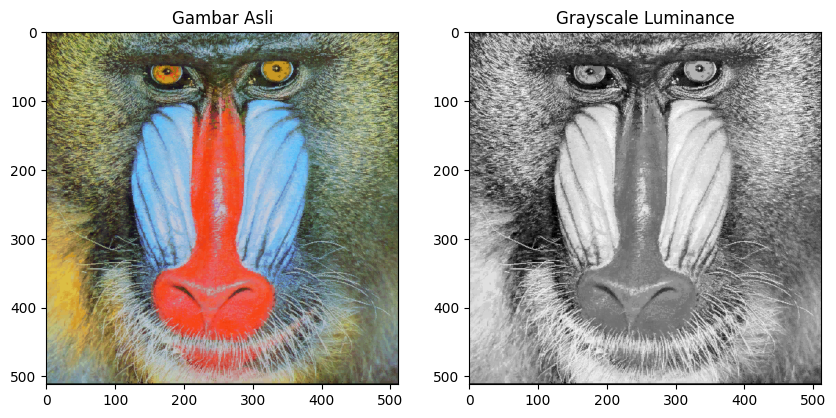

In [ ]:
# Fungsi untuk menerapkan transformasi grayscale dengan metode luminance
luminance_image = 0.21 * original[:,:,2] + 0.72 * original[:,:,1] + 0.07 * original[:,:,0]

# Plot gambar original dan grayscale
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title("Grayscale Luminance")
plt.imshow(luminance_image, cmap='gray')
plt.axis('on')

plt.show()

## 5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

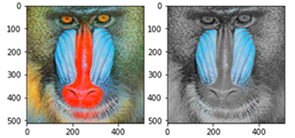

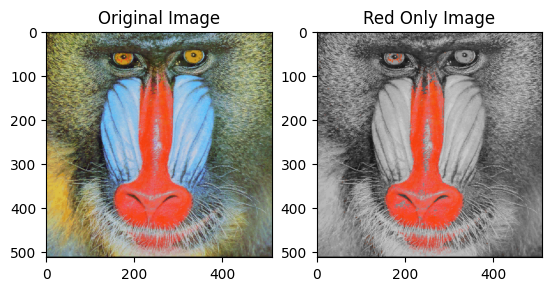

In [ ]:
import cv2

original = cv2.imread('/content/drive/MyDrive/PCVK/monkey.png')

# Mengubah gambar ke ruang warna HSV
hsv_image = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)

# Definisi rentang warna merah dalam HSV
# Warna merah berada di dua rentang dalam HSV
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
# lower_red2 = np.array([170, 50, 50])
# upper_red2 = np.array([180, 255, 255])

# Membuat masker berdasarkan rentang warna merah
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
# red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
red_mask = red_mask1  # Menggabungkan dua rentang warna merah

# Mengubah bagian lain yang tidak berwarna merah menjadi grayscale
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

# Ubah grayscale menjadi citra 3 channel agar bisa digabungkan dengan masker
gray_3channel = cv2.merge([gray, gray, gray])

# Terapkan masker untuk mempertahankan warna merah
result = np.where(red_mask[:,:,None] == 255, original, gray_3channel)

# Menampilkan hasil transformasi
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Red Only Image")
plt.show()